In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

LABELS_PATH = "Dataset/Total GT"
IMAGES_PATH = "Dataset/Total Images"

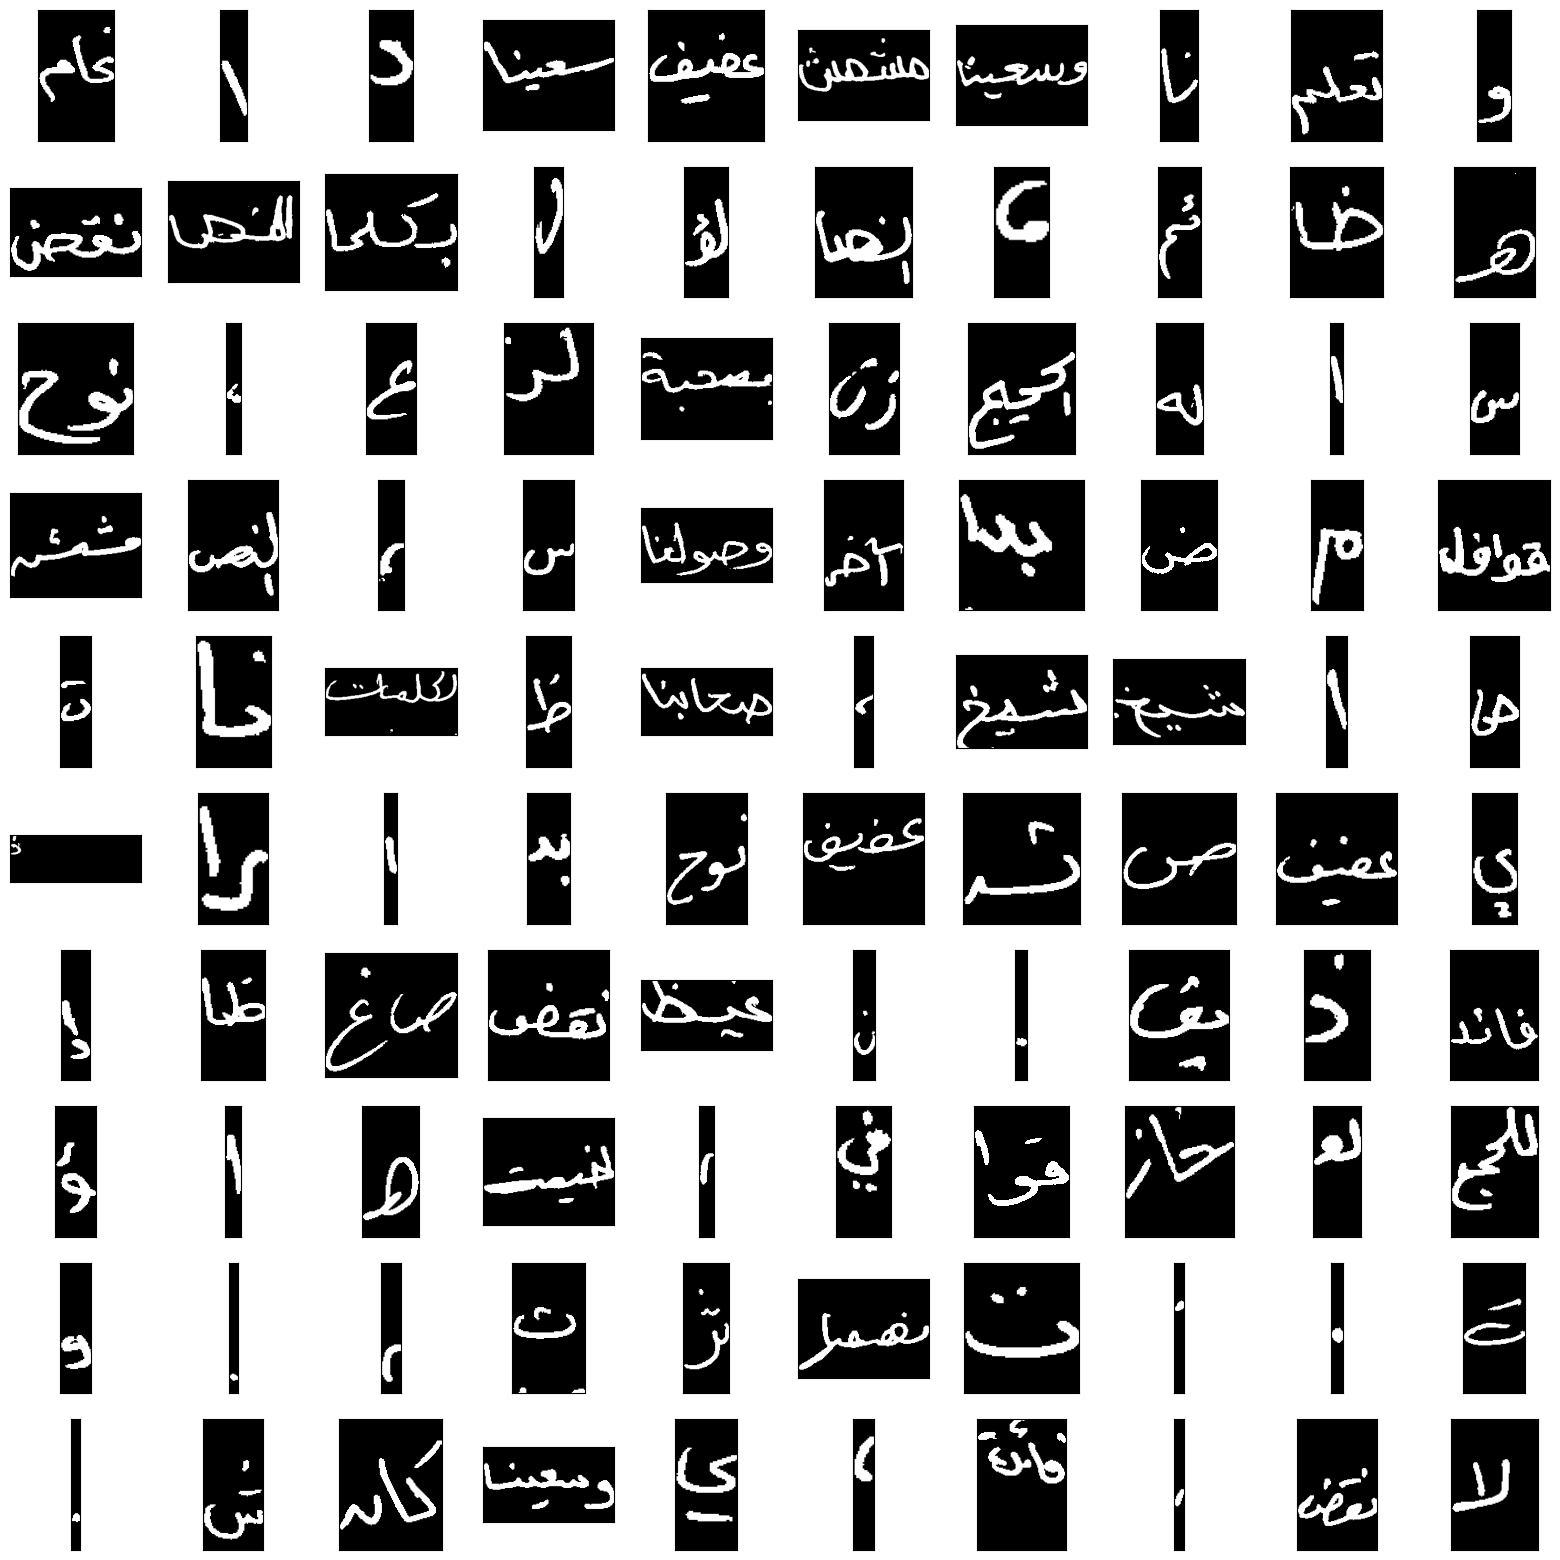

In [2]:
fig, axs = plt.subplots(10,10, figsize=(20,20))

for i in range(10):
    for j in range(10):
        image_name = random.choice(os.listdir(IMAGES_PATH))
        image = Image.open(os.path.join(IMAGES_PATH, image_name))
        axs[i,j].imshow(image, cmap="gray")
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])

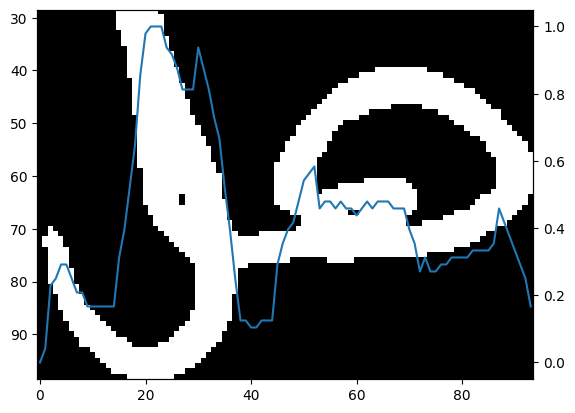

In [57]:
image_name = random.choice(os.listdir(IMAGES_PATH))
image = Image.open(os.path.join(IMAGES_PATH, image_name))

v_count = np.array(image).sum(axis=0)
v_count = v_count/v_count.max()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.imshow(image,cmap="gray")
ax2.plot(v_count)
plt.show()

`AHTD3A0211_Para1_4_word8.tif`

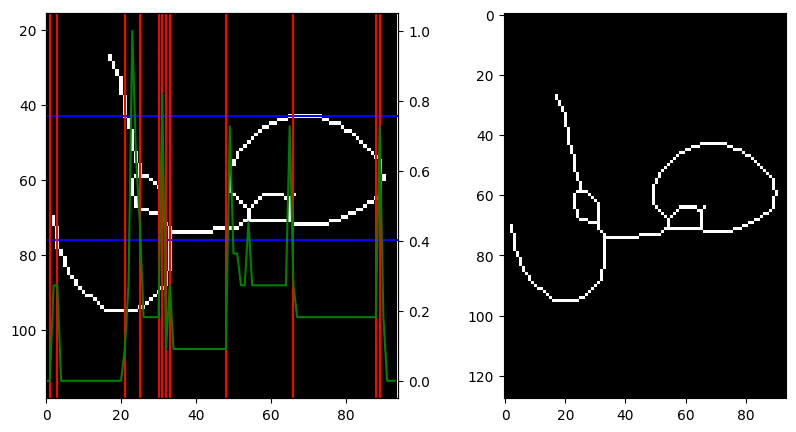

In [58]:
from skimage import io, morphology

def get_core_zone(image_array, threshold=0.3):
    row_sums = image_array.sum(axis=1)
    row_sums = row_sums/row_sums.max()

    upper = np.argmax(row_sums>0.3)
    lower = height-np.argmax(np.flip(row_sums)>threshold)+1

    return row_sums, (upper, lower)

def split_word(image_array, core_zone, threshold=0.4):
    col_sums = image_array[core_zone[0]:core_zone[1]].sum(axis=0)
    col_sums = col_sums/col_sums.max()

    segment_indices = np.where(
        np.abs(
            np.diff(
                    (col_sums>threshold)  # Above threshold
                )  # Derivative
            ) == 1  # Where it abs value equals one
        )[0]
    return col_sums, segment_indices

image_array = np.array(image)>=255
# Remove small objects
image_array = morphology.remove_small_objects(image_array, min_size=250)
image_array = morphology.skeletonize(image_array)

height, width = image_array.shape

row_sums, core_zone = get_core_zone(image_array, 0.5)
col_sums, segment_indices = split_word(image_array, core_zone, 0.2)

fig, (ax, ax2 )= plt.subplots(1,2, figsize=(10,5))

ax.imshow(image_array, cmap="gray")
ax.hlines(core_zone[0], 0 ,width, color="b")
ax.hlines(core_zone[1], 0 ,width, color="b")

ax.twinx().plot(col_sums, color='g')

ax.vlines(segment_indices, 0, height, color="r")

ax.set_xlim(0,width)

ax2.imshow(image_array, cmap="gray")

plt.show()

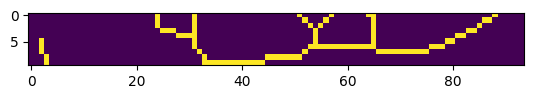

In [59]:
band_height = 10
band_sums = np.zeros(height-band_height)
for i in range(height-band_height):
    band_sums[i] = image_array[i:i+band_height,:].sum()

band_idx = np.argmax(band_sums)
plt.imshow(image_array[band_idx:band_idx+band_height])


In [4]:
labels = set()
for label_file in os.listdir(LABELS_PATH):
    file_path = os.path.join(LABELS_PATH, label_file)
    with open(file_path, "r") as f:
        label = f.read()
    labels.add(label)
labels = list(labels)

In [ ]:
labels